In [ ]:
# Bu analizde 2012-2014 yıllarına ait veriler incelenmiştir.

Trafik akışının değişmesi kazaları nasıl etkiler?
Kaza oranlarını ne artırır?
Zaman içinde kaza oranlarını tahmin edebilir miyiz?
Kırsal ve kentsel alanlar nasıl farklılaştı?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [7]:
path=r'C:\Users\Lenovo\Desktop\accidents_2012_to_2014.csv'
df=pd.read_csv(path, low_memory=False) 
#Veri seti okunurken bazı sütunlar hem sayısal hem metinsel veri içerdiğinden `low_memory=False` parametresi kullanılarak uyarı kapatılmıştır.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               464697 non-null  object 
 1   Location_Easting_OSGR                        464697 non-null  int64  
 2   Location_Northing_OSGR                       464697 non-null  int64  
 3   Longitude                                    464697 non-null  float64
 4   Latitude                                     464697 non-null  float64
 5   Police_Force                                 464697 non-null  int64  
 6   Accident_Severity                            464697 non-null  int64  
 7   Number_of_Vehicles                           464697 non-null  int64  
 8   Number_of_Casualties                         464697 non-null  int64  
 9   Date                                         464697 non-nul

In [31]:
df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002890,2012
5,201201BS70006,526090,177600,-0.185496,51.483253,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002912,2012
6,201201BS70007,527780,179680,-0.160418,51.501567,1,3,1,1,12/01/2012,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002818,2012
7,201201BS70008,524010,182080,-0.213862,51.523975,1,3,2,1,07/01/2012,...,Zebra crossing,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002905,2012
8,201201BS70010,527710,179290,-0.161567,51.498077,1,3,2,1,07/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,No,E01002818,2012
9,201201BS70011,525120,180060,-0.198587,51.505576,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002825,2012


In [33]:
df.isnull().sum().sort_values(ascending=False)

Junction_Detail                                464697
Carriageway_Hazards                            456850
Special_Conditions_at_Site                     454387
Junction_Control                               178610
LSOA_of_Accident_Location                       28718
Road_Surface_Conditions                           755
Time                                               13
Did_Police_Officer_Attend_Scene_of_Accident         2
2nd_Road_Class                                      0
2nd_Road_Number                                     0
Pedestrian_Crossing-Human_Control                   0
Accident_Index                                      0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions                                    0
Speed_limit                                         0
Urban_or_Rural_Area                                 0
Weather_Conditions                                  0
Road_Type                                           0
Location_Easting_OSGR       

In [ ]:
# Trafik akışının kazaya etkisini anlamak için, saat ve araç sayısı verilerini analiz edeceğim.


In [81]:
# Araç sayısının istatistikleri
df["Number_of_Vehicles"].describe().T

count    464697.000000
mean          1.828086
std           0.708703
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          67.000000
Name: Number_of_Vehicles, dtype: float64

In [91]:
adet = (df['Number_of_Vehicles'] == 67).sum()
print(adet)


1


Kazaya karışan araç sayısı genellikle 1 ile 2 arasında değişmektedir. Maksimum değer olan 67 ise aykırı bir durumdur; ancak bu değerin yalnızca bir kez görülmesi, veri bütünlüğünü bozacak düzeyde olmadığı için herhangi bir müdahalede bulunulmamıştır.

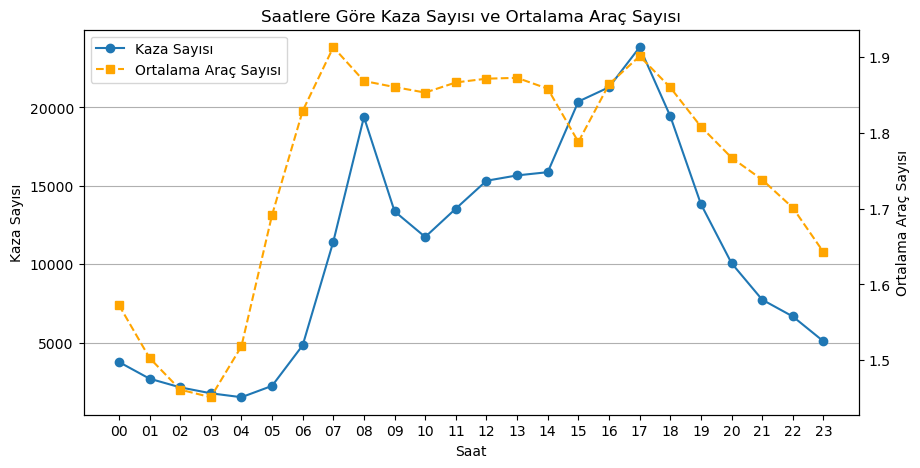

In [132]:
df_hour = df.copy()
df_hour['Hour'] = df_hour['Time'].str[:2]

# Kaza sayısı için eşsiz Accident_Index kullandım
hourly_accidents = df_hour.groupby('Hour')['Accident_Index'].nunique().reindex(["%02d" % i for i in range(24)], fill_value=0)

# Her saat için ortalama araç sayısı
avg_vehicles = df_hour.groupby('Hour')['Number_of_Vehicles'].mean().reindex(["%02d" % i for i in range(24)], fill_value=0)


fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(hourly_accidents.index, hourly_accidents.values, marker='o', label='Kaza Sayısı')
ax1.set_xlabel('Saat')
ax1.set_ylabel('Kaza Sayısı')
ax1.set_title('Saatlere Göre Kaza Sayısı ve Ortalama Araç Sayısı')
ax1.set_xticks(range(0, 24))
ax1.set_xticklabels(["%02d" % i for i in range(24)])
ax1.grid(axis='y')


# İkincil y eksende ortalama araç sayısı çizgisi
ax2 = ax1.twinx()
ax2.plot(avg_vehicles.index, avg_vehicles.values, marker='s', linestyle='--', label='Ortalama Araç Sayısı', color='orange')
ax2.set_ylabel('Ortalama Araç Sayısı')

# Legend ayarı
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

* Trafik akışı arttıkça hem kaza sayısı hem de kazaya karışan araç sayısı artmaktadır.

* Tek araçlı kazalar genellikle gece saatlerinde görülmektedir. Bu saatlerde sürücüler yorgunluk, alkol ya da dikkatsizlik nedeniyle kaza yapmış olabilirler.

* Buna karşılık, çok araçlı kazalar sabah ve akşam trafiğin yoğun olduğu saatlerde daha sık meydana gelmektedir.

Sonuç olarak, trafik akışının kazalar üzerinde önemli bir etkisi olduğu ve trafik yoğunluğu ile kaza sayısı arasında paralel bir ilişki bulunduğu söylenebilir.



In [ ]:
# Kırsal ve kentsel alanlar nasıl değişiyor?

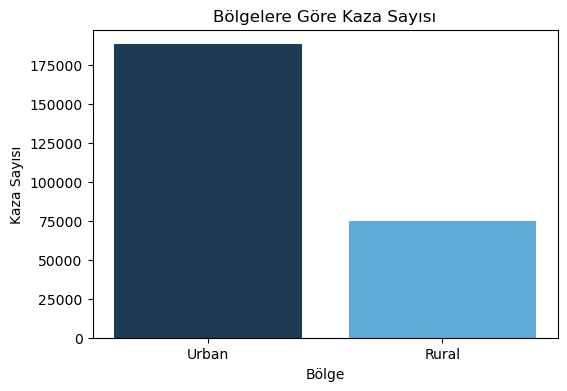

In [45]:
# Urban_or_Rural_Area'ya göre kaza sayısı


df_unique = df.drop_duplicates(subset='Accident_Index', keep='first') #Her kaza için tekil bir satır seçer

region_accident_counts = df_unique['Urban_or_Rural_Area'].value_counts().sort_index()

# Bölge kodlarını isimlendirelim
area_labels = {1: 'Urban', 2: 'Rural'}
region_accident_counts.index = region_accident_counts.index.map(area_labels)


plt.figure(figsize=(6,4))
plt.bar(region_accident_counts.index, region_accident_counts.values,color=colors)
plt.xlabel('Bölge')
plt.ylabel('Kaza Sayısı')
plt.title('Bölgelere Göre Kaza Sayısı')
plt.show()


In [143]:
# Korelasyon matrisi oluşturulacak sütunlar
corr_columns = [
    'Accident_Severity',  
    'Speed_limit',
    'Urban_or_Rural_Area']

corr_matrix = df_unique[corr_columns].corr()
corr_matrix 

,Accident_Severity,Speed_limit,Urban_or_Rural_Area
Accident_Severity,1.000000,-0.070691,-0.079016
Speed_limit,-0.070691,1.000000,0.685267
Urban_or_Rural_Area,-0.079016,0.685267,1.000000


Hız limiti ve bölge arasında güçlü ilişki var.

In [173]:
# Bölgelere göre ortalama hız limiti
mean_speed_by_area = df_unique.groupby('Urban_or_Rural_Area')['Speed_limit'].mean()

area_labels = {1: 'Urban', 2: 'Rural'}
mean_speed_by_area.index = mean_speed_by_area.index.map(area_labels)

print(mean_speed_by_area)


Urban_or_Rural_Area
Urban    31.365922
Rural    51.140687
Name: Speed_limit, dtype: float64


Kırsal bölgelerde hız limitleri daha yüksek; ancak bu, kaza oranlarını arttırdığı anlamına gelmiyor. Çünkü kaza sayısı kentte daha fazladır. Yani hız yüksekliği ile kaza oranı arasında net bir ilişki bulunmamaktadır.

 

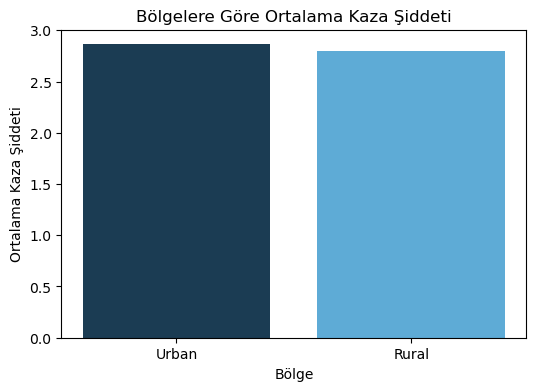

In [10]:
# Bölgelere göre ortalama kaza şiddeti
mean_severity_by_area = df_unique.groupby('Urban_or_Rural_Area')['Accident_Severity'].mean()
area_labels = {1: 'Urban', 2: 'Rural'}
mean_severity_by_area.index = mean_severity_by_area.index.map(area_labels)
colors = ['#1B3C53', '#5EABD6']
# Bar grafik
plt.figure(figsize=(6,4))
plt.bar(mean_severity_by_area.index, mean_severity_by_area.values, color=colors)
plt.xlabel('Bölge')
plt.ylabel('Ortalama Kaza Şiddeti')
plt.title('Bölgelere Göre Ortalama Kaza Şiddeti')
plt.show()

Not: Veri setinin uluslararası standartlara ve dağılımına uygun olarak, “Accident_Severity” değişkeninde 3: Hafif, 2: Ciddi, 1: Ölümcül kazayı temsil etmektedir. En sık görülen değer olan 3’ün hafif yaralanmayı temsil ettiği varsayılmıştır.
İki bölgede de meydana gelen kazaların şiddeti birbirine çok yakın gözükmektedir.

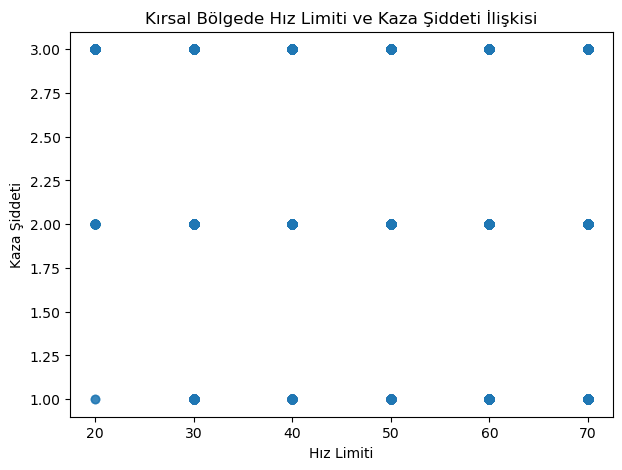

In [187]:
rural_df = df_unique[df_unique['Urban_or_Rural_Area'] == 2]

plt.figure(figsize=(7,5))
plt.scatter(rural_df['Speed_limit'], rural_df['Accident_Severity'], alpha=0.5)
plt.xlabel('Hız Limiti')
plt.ylabel('Kaza Şiddeti')
plt.title('Kırsal Bölgede Hız Limiti ve Kaza Şiddeti İlişkisi')
plt.show()

Kırsal bölgede hız limiti ile kaza şiddeti arasında belirgin bir ilişki yok.
Her hız limitinde hem hafif hem ölümcül kazalar meydana gelmiş.

In [ ]:
# Kaza oranlarını ne artırır?

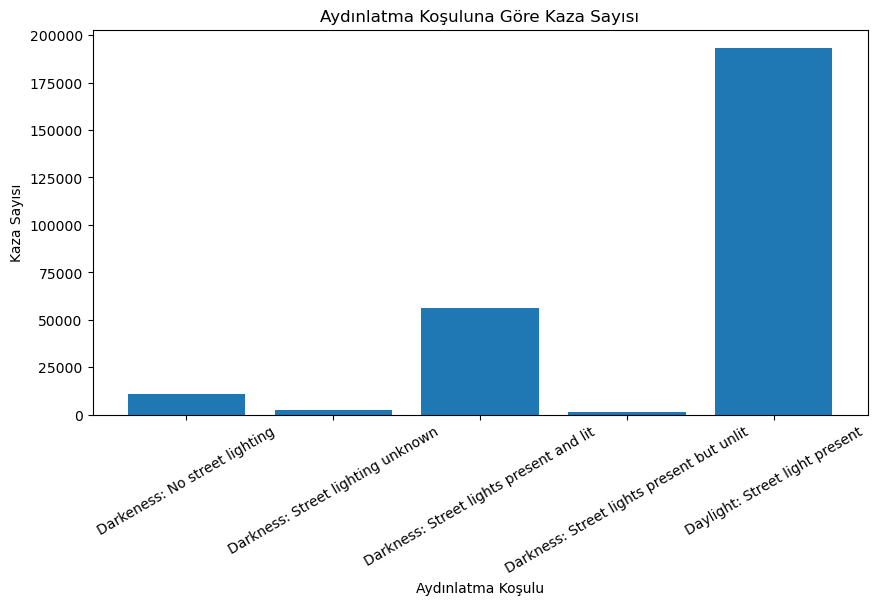

In [16]:
# ışık koşullarına göre kaza sayısı

counts = df_unique['Light_Conditions'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values)
plt.xlabel('Aydınlatma Koşulu')
plt.ylabel('Kaza Sayısı')
plt.title('Aydınlatma Koşuluna Göre Kaza Sayısı')
plt.xticks(rotation=30)
plt.show()


Karanlık ve aydınlatmasız alanlarda kaza sayısının daha az, gündüz saatlerinde ise en fazla olması, bu durumun trafik yoğunluğuyla ilişkili olabileceğini göstermektedir.

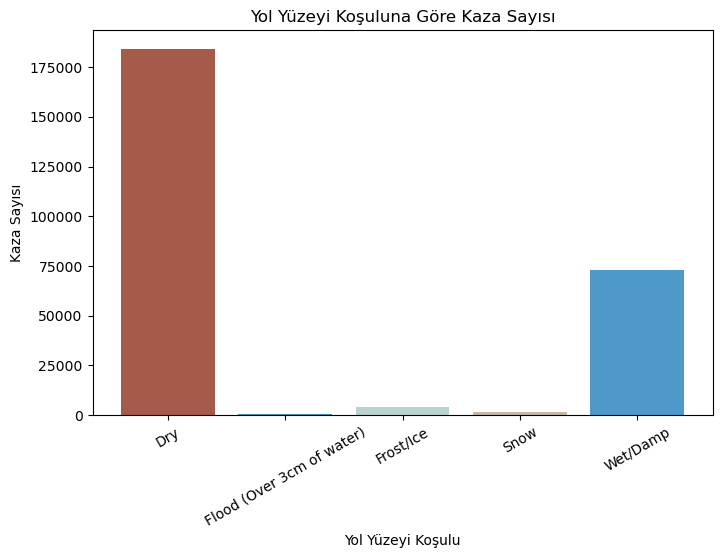

In [23]:
# Road_Surface_Conditions'a göre kaza sayısı
surface_counts = df_unique['Road_Surface_Conditions'].value_counts().sort_index()
palette = ['#A55B4B', '#4793AF', '#B9D2D2', '#C7B7A3','#4F98CA']
plt.figure(figsize=(8,5))
plt.bar(surface_counts.index, surface_counts.values, color=palette)
plt.xlabel('Yol Yüzeyi Koşulu')
plt.ylabel('Kaza Sayısı')
plt.title('Yol Yüzeyi Koşuluna Göre Kaza Sayısı')
plt.xticks(rotation=30)
plt.show()

Kazaların büyük çoğunluğu kuru yol yüzeyinde meydana gelmektedir.Bu duruma kuru yolda trafik hacminin yoğun olması neden olmuş olabilir. Islak/nemli yol koşullarında da kayda değer miktarda kaza görülürken, kar, buz ve su baskını gibi zorlu yol koşullarında kaza sayısı oldukça düşüktür. 

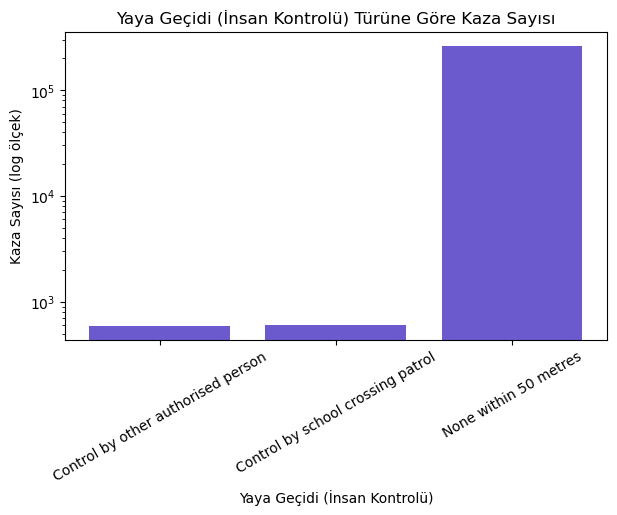

Pedestrian_Crossing-Human_Control
None within 50 metres                 262615
Control by school crossing patrol        603
Control by other authorised person       593
Name: count, dtype: int64


In [77]:
# Pedestrian_Crossing-Human_Control'a göre kaza sayısı
pedestrian_counts = df_unique['Pedestrian_Crossing-Human_Control'].value_counts().sort_index()

plt.figure(figsize=(7,4))
plt.bar(pedestrian_counts.index, pedestrian_counts.values, color='slateblue')
plt.xlabel('Yaya Geçidi (İnsan Kontrolü)')
plt.ylabel('Kaza Sayısı (log ölçek)')
plt.title('Yaya Geçidi (İnsan Kontrolü) Türüne Göre Kaza Sayısı')
plt.xticks(rotation=30)
plt.yscale('log') #barların görünürlüğü log ölçeği ile arttırıldı
plt.show()

print(pedestrian_counts.sort_values(ascending=False))


İnsan kontrollü yaya geçitlerinde kaza sayısı oldukça düşükken, insan kontrolü olmayan geçitlerde kaza sayısı dikkat çekici derecede yüksektir. Bu durum, insan kontrolünün bulunduğu geçitlerin kaza önleyici etkisinin yüksek olduğunu ve insan kontrolü olmayan geçitlerin kazaların oluşumunda önemli bir rol oynadığını göstermektedir.

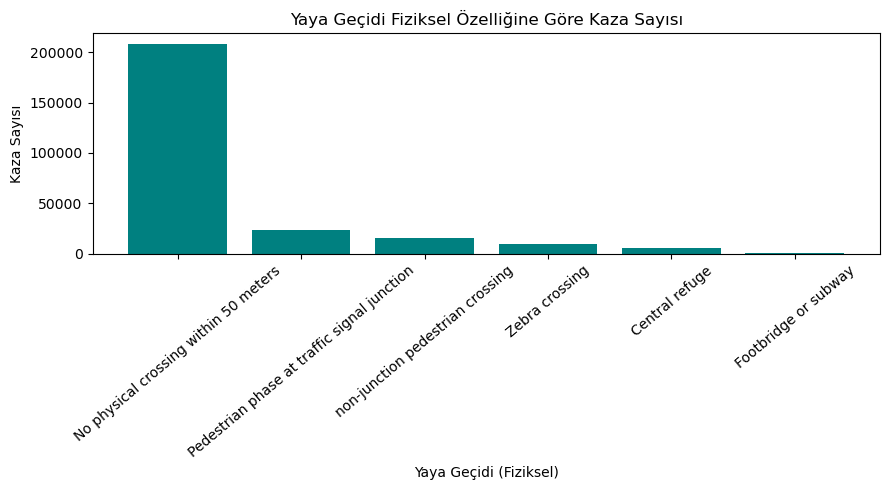

In [82]:
# Physical Facilities'a göre kaza sayısı
physical_counts = df_unique['Pedestrian_Crossing-Physical_Facilities'].value_counts()

plt.figure(figsize=(9,5))
plt.bar(physical_counts.index, physical_counts.values, color='teal')
plt.xlabel('Yaya Geçidi (Fiziksel)')
plt.ylabel('Kaza Sayısı')
plt.title('Yaya Geçidi Fiziksel Özelliğine Göre Kaza Sayısı')
plt.xticks(rotation=40, fontsize=10)
plt.tight_layout()
plt.show()

Kazaların büyük çoğunluğu, 50 metre içinde herhangi bir fiziksel yaya geçidi bulunmayan yerlerde meydana gelmiştir. Fiziksel yaya geçidi (örneğin zebra geçidi, trafik ışığı, merkezi ada, üst/alt geçit) olan bölgelerde kaza sayısı belirgin şekilde daha düşüktür. Bu sonuç, fiziksel yaya geçidi altyapısının kazaları önlemede önemli bir rol oynayabileceğini göstermektedir.